<a href="https://colab.research.google.com/github/bkestelman/montecarlo/blob/master/monte_carlo_integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### Estimation of area under quarter circle in first quadrant

In [3]:
### Method 1 - Indicator Function

def indicator_in_circle(point):
    return point[0]*point[0] + point[1]*point[1] < 1

def random_point_first_quadrant():
    return np.random.uniform(0, 1, size=2)

In [4]:
N = 100
points_in_circle = 0

for i in range(N):
    point = random_point_first_quadrant()
    points_in_circle += indicator_in_circle(point)

area = points_in_circle / N
area # expected ~ pi / 4

0.78

In [5]:
np.pi / 4

0.7853981633974483

In [6]:
### Method 2 - Sampling x and f(x)

def f(x):
    return np.sqrt(1 - x * x)

In [7]:
N = 100
sum_f = 0

for i in range(N):
    x = np.random.uniform(0, 1)
    sum_f += f(x)

area = sum_f / N
area

0.7819605694625313

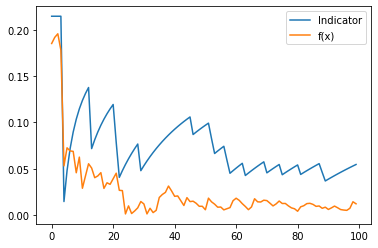

In [10]:
### Comparison of convergence

N = 100
sum_indicator = 0
sum_f = 0
target = np.pi / 4
errors_indicator = []
errors_f = []

for i in range(1, N+1):
    sum_indicator += indicator_in_circle(random_point_first_quadrant())
    sum_f += f(np.random.uniform(0, 1))
    area_indicator = sum_indicator / i
    area_f = sum_f / i
    errors_indicator.append(np.abs(target - area_indicator))
    errors_f.append(np.abs(target - area_f))

plt.plot(errors_indicator, label='Indicator')
plt.plot(errors_f, label='f(x)')
plt.legend()